# Homogene Koordinatensysteme

Für gewöhnlich schreiben wir Koordinaten in einem 2-Dimensionalen Koordinatensystem so: $P = [x , y]^T$
In einem Homogenen Koordinatensystem fügen wir eine extra Zeile ein, diese Zeile enthält für gewöhnlich einfach nur die Zahl 1. So kann man den Punkt $P$ zu dem Punkt $\tilde{P}$ mit: $\tilde{P} = [\tilde{x}, \tilde{y}, 1]^T$ transformieren. Wie man zu $\tilde{x}$ und $\tilde{x}$ wird später erklärt.

Auch wenn das zunächst nach einer ünnützen mathematischen Formalität aussieht, so haben homogene Koordinatensysteme doch einige sehr interessante Eigenschaften die man sich zu Nutze machen kann.

## Kreuzprodukte

### Eine Linie zwischen zwei Punkten
Für gewöhnlich schreiben wir Geraden mit der Geradengleichung auf. Dies wäre dann z.B. $y = bx + c$ oder in einer sehr allgemeinen Form: $ ay + bx + c = 0$. Um den VerbindungsVEKTOR zwischen diesen beiden Punkten herauszufinden können wir einfach ein Steigungsdreieck anwenden. Dies wäre dann in der mathematischen Form $P_2 - P_1$. Allerdings müssten wir dann uns mühsam eine Geradengleichung aus diesem Ergebnis herleiten ($y = mx + b$).

Dies machen wir indem wir $m = \frac{y_2 - y_1}{x_2 - x_1}$ und $b = y_1 - m x_1$ rechnen. Was hier natürlich auffällt ist, dass es nicht möglich ist eine vertikale Linie abzubilden, da m in diesen Fall unendlich groß wird.

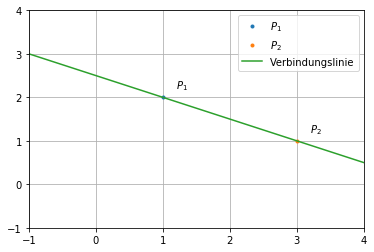

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Punkte initialisieren
punkt_1 = np.array([1 , 2])
punkt_2 = np.array([3, 1])


# Geradengleichung
punkt_vektor = punkt_2 - punkt_1
steigung = punkt_vektor[1] / punkt_vektor[0]
verschiebung = punkt_1[1] - (steigung * punkt_1[0]) 

# Erstellung der Geraden
x_linie = np.linspace(-10 , 10, 1000)
y_linie = np.array(steigung * x_linie) + verschiebung


fig, ax= plt.subplots()

ax.plot(punkt_1[0], punkt_1[1], ".", label = "$P_1$")
ax.annotate("$P_1$", (punkt_1[0] + .2, punkt_1[1] + .2))
ax.plot(punkt_2[0], punkt_2[1], ".", label = "$P_2$")
ax.annotate("$P_2$", (punkt_2[0] + .2, punkt_2[1] + .2))
ax.plot(x_linie, y_linie, label = "Verbindungslinie")
ax.set_xlim(-1, 4)         
ax.set_ylim(-1, 4)
ax.legend()
ax.grid()

Wenn wir jetzt allerdings homogene Koordinaten verwenden können wir einfach das Kreuzprodukt der beiden Punkte $\tilde{P_1}$ und $\tilde{P_2}$ bilden. $\tilde{l} = \tilde{P_1} x \tilde{P_2}$

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Punkte initialisieren
punkt_1 = np.array([1 , 2, 1])
punkt_2 = np.array([3, 1, 1])

# Kreuzprodukt
kreuzprodukt = np.cross(punkt_1, punkt_2)
print(kreuzprodukt)

[ 1  2 -5]


Das Interessante an homogenen Koordinaten ist, dass Punkte und Linien das selbe sind. Man kann zudem sehr leicht überprüfen ob ein Punkt sich auf einer Linie befindet. Wenn dies zutrifft ist das Skalarprodukt zwischen Punkt und Linie stehts 0. $\tilde{l} \tilde{P_2} = 0$

In [21]:
import numpy as np


# Punkte initialisieren
punkt_1 = np.array([1 , 2, 1])
punkt_2 = np.array([3, 1, 1])

# Kreuzprodukt
linie = np.cross(punkt_1, punkt_2)

# Skalarprodukt
skalarprudukt = np.dot(linie, punkt_2)
print(skalarprudukt)

0


## Ein Schnittpunkt zwischen zwei Linien

Andersherum kann man den Schnittpunkt zweier Linien mit dem Kreuzprodukt dieser beiden herausfinden. $\tilde{P} = \tilde{l_1} x \tilde{l_2}$

In [23]:
import numpy as np


# Punkte initialisieren
linie_1 = np.array([4 , 3, 1])
linie_2 = np.array([1, 2, 1])

# Kreuzprodukt
schnittpunkt = np.cross(linie_1, linie_2)

print(schnittpunkt)

[ 1 -3  5]


# Tensornotation

Die Tensornotation ist eine spezielle Notation die Häufig bei Koordinatentransformationen verwendet wird. Die ein üblicher Punkt wird dann nicht mehr als $\overrightarrow{P}$ sondern mit einem hochgestelltem Buchstaben notiert $P^i$. Eine Linie wäre dann nicht mehr $\overrightarrow{L^T}$ sondern $L_i$. Wenn wir eine Transformationsmatrize haben dann stellen wir damit den Transformationsweg dar. Von dem Anfangssystem a zum Zielsystem z wäre dies dann: $M_a^z$. Besonders diese Matrixschreibweise hilft dabei leichter die Transformationsrichtung zu erkennen.

Wenn ich nun gerne den Bildpunkt $P^c$ wissen möchte dann kann ich diesen mit der Matrize $M_w^c$ aus dem Weltpunkt $P^w$ bestimmen. $P^c = M_w^c P^w$

# Wozu das ganze?

Wir wollen in diesem Projekt ein dreidimensionalen Punkt auf einer zweidimensionaler Ebene abbilden. Hierfür sind homogene Koordinaten sehr gut geeignet, da ich sehr leicht den Punk in der realen Welt $P^w$ auf einem 2 Dimensionalen Punkt auf einer Kamera abbilden kann $P^c$. Hierfür benötige ich einfach nur den Weltpunkt $P^w = [X, Y, Z, 1]^T$ als homogene Koordinate darstellen und mit einer Matrize multiplizieren. 

\begin{equation*}
\begin{pmatrix}\tilde{x}\\
\tilde{y}\\
\tilde{z}
\end{pmatrix} =  \begin{vmatrix}
f & 0 & 0 & 0 \\
0 & f & 0 & 0 \\
0 & 0 & 1 & 0
\end{vmatrix}
* \begin{pmatrix}X\\Y\\Z\\1
\end{pmatrix}
\end{equation*}

Wobei f der Brennweite der Kamera darstellt.

Um jetzt unser homogenen Punkt $\tilde{P^c}$ in einen karthesischen Punkt $P^c$ zu transformieren müssen wir einfach folgende Rechenregeln anwenden: $x = \tilde{x} / \tilde{z}$ und $\tilde{y} / \tilde{z}$

Das große Problem hierbei ist allerdings, dass wir durch den Verlust einer Dimension unser Bild verzerren. Das ist ein Effekt der uns in unserem alltäglichen Leben kaum auffällt, da unsere Augen auch eine dreidimensionale Welt auf eine zweidimensionale Retina abbilden. Vorstellen kann man sich das Problem leicht mit Eisenbahnschienen. Obwohl diese in der Realität parallel nebeinander herlaufen, laufen diese in der Wirklichkeit parallelen Linien in unserer Wahrnehmung aufeinander zu. und scheinen sich sogar in großer Entfernung zu berühren.
![Schienen](https://c.pxhere.com/photos/02/da/rail_way_railway_railroad_tracks_tracks_nature_canada_british_columbia-993115.jpg!d)

# Planare Homographie 

Wir können jetzt durch unser Wissen über homogene Koordinaten und mittels der planaren Homographie diese Bilder entzerren. Hierfür schauen wis uns zunächst die Gleichung für eine homographische Transformation an:

\begin{equation*}
\begin{pmatrix}x'\\
y'\\
1
\end{pmatrix} =  \begin{vmatrix}
h_{11} & h_{12} & h_{13}\\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & 1
\end{vmatrix}
* \begin{pmatrix}\tilde{x}\\
\tilde{y}\\
1
\end{pmatrix}
\end{equation*}


Wenn in einem Bild mehrere Bildpunkte bekannt sind, die auf einer Ebenene liegen können die genauen Werte von $h_{ij}$ bestimmt werden. Der Trick hierbei ist, dass somit der die Koordinate Z für jeden Weltpunk $P^w$ gleich 0 gesetzt werden kann.

Wenn man dann die Homographiematrix kennt kann man diese auf jeden einzelnen Pixel eines Bildes anwenden und somit ein Bild entzerren.

![Entzerren](https://docs.opencv.org/master/homography_perspective_correction.jpg)